<a href="https://colab.research.google.com/github/marcelomonier/Churn_Prediction/blob/main/Projeto_Churn_Prediction_para_uma_empresa_de_Telecomunica%C3%A7%C3%B5es_ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="25%" src="https://github.com/marcelomonier/airbnb_project/blob/main/logo_moment.png?raw=true">



---

# **Churn Prediction**

*Churn Prediction* é um problema recorrente na indústria de telecomunicações. *Churn* é a taxa que define o cliente que está migrando de um provedor de serviços de telecomunicações para outro.

</br>
<center>
<img alt="Colaboratory logo" width="55%" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTju9CLRk4jQf96bVC1LQ9K9R5wD8nxRFLzLQ&usqp=CAU">
</center>

</br>

Atrair novos clientes para uma empresa é um assunto mais tedioso, demorado e caro. Portanto, uma empresa deve visar o cliente existente, em vez de procurar a aquisição de novos clientes. Michael C. Mozer et al. [1] provou que a taxa na qual o cliente se desloca de uma empresa para outra determina a taxa de perda. Sendo assim, é essencial identificar o cliente que provavelmente deixará o serviço. O objetivo é construir um modelo com poder preditivo e fornecer insights sobre o comportamento da rotatividade de clientes para a empresa.



## Aquisição dos Dados

Os dados utilizados neste projeto foram originalmente disponibilizados na [plataforma de ensino da IBM Developer](https://developer.ibm.com/technologies/data-science/patterns/predict-customer-churn-using-watson-studio-and-jupyter-notebooks/#), e tratam de um problema típico de uma companhia de telecomunicações. O *dataset* completo pode ser encontrado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv).

Apesar de não haver informações explícitas disponíves, os nomes das colunas permitem um entendimento a respeito do problema.

In [1]:
# Importar os pacotes necessários
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importar os dados
data = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(data)

# Mostrar as 5 primeiras entradas
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [2]:
## Verifica os valores únicos de cada coluna
for column in df.columns:
    print('Column: {} - Unique Values: {}'.format(column, df[column].unique()))

Column: customerID - Unique Values: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
Column: gender - Unique Values: ['Female' 'Male']
Column: SeniorCitizen - Unique Values: [0 1]
Column: Partner - Unique Values: ['Yes' 'No']
Column: Dependents - Unique Values: ['No' 'Yes']
Column: tenure - Unique Values: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
Column: PhoneService - Unique Values: ['No' 'Yes']
Column: MultipleLines - Unique Values: ['No phone service' 'No' 'Yes']
Column: InternetService - Unique Values: ['DSL' 'Fiber optic' 'No']
Column: OnlineSecurity - Unique Values: ['No' 'Yes' 'No internet service']
Column: OnlineBackup - Unique Values: ['Yes' 'No' 'No internet service']
Column: DeviceProtection - Unique Values: ['No' 'Yes' 'No internet service']
Column: TechSuppor

Como mostrado acima, o conjunto de dados contém 21 variáveis independentes, que será classificado no dicionário de dados e dividos em 3 grupos:

## Dicionário do *dataset*


`customerID`  - ID do usuário.

</br>


**Informação demográfica**

`gender`  - Se o cliente é uma mulher ou um homem (Feminino, Masculino).

`SeniorCitizen`  - Se o cliente é idoso ou não ( 0, 1).

`Partner`  - Se o cliente tem parceiro ou não (Sim, Não).

`Dependents`  - Se o cliente tem dependentes ou não (Sim, Não).

</br>


**Informações da conta do cliente**


`tenure` - Número de meses que o cliente permaneceu na empresa (vários valores numéricos diferentes).

`Contract` - Indica o tipo de contrato atual do cliente (Mês a mês, Um ano, Dois anos).

`PaperlessBilling` - Se o cliente tem faturamento sem papel ou não (Sim, Não).

`PaymentMethod` - Método de pagamento do cliente (cheque eletrônico, cheque postal, transferência bancária (automática), cartão de crédito (automático)).

`MontlyCharges` - O valor cobrado do cliente mensalmente (vários valores numéricos diferentes).

`TotalCharges` - O valor total cobrado do cliente (vários valores numéricos diferentes).

</br>


**Informações de Serviços**

`PhoneService`  - Se o cliente tem ou não serviço telefônico (Sim, Não).

`MultipleLines`  - Se o cliente tem várias linhas ou não (Sem serviço telefônico, Não, Sim).

`InternetService`  - Se o cliente é assinante do serviço de Internet com a empresa (DSL, Fibra óptica, Não)

`OnlineSecurity`  - Se o cliente tem segurança online ou não (Sem serviço de internet, Não, Sim).

`OnlineBackup`  - Se o cliente tem backup online ou não (Sem serviço de internet, Não, Sim).

`DeviceProtection`  - Se o cliente tem proteção de dispositivo ou não (Sem serviço de internet, Não, Sim).

`TechSupport`  - Se o cliente tem suporte técnico ou não (Sem serviço de internet, Não, Sim).

`StreamingTV`  - Se o cliente tem streaming de TV ou não (Sem serviço de internet, Não, Sim).

`StreamingMovies`  - Se o cliente tem streaming de filmes ou não (Sem serviço de internet, Não, Sim).

`Churn`  - Indica se o cliente saiu no último mês

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Acima podemos perceber que o *dataset* em comento, possui 7043 linhas e 21 colunas. Teoricamente, não há valores nulos no conjunto de dados. Entretanto, obesrevamos que a coluna `TotalCharges` foi detectada como objeto, ou seja, a análise está errada. A coluna em questão respresenta o valor total cobrado do cliente e, sendo assim, é uma variável numérica. 

A fim de analisar de forma mais aprofundada, é necessário transformar essa coluna em um tipo de dado numérico. Por padrão, essa função gera uma exceção quando vê dados não numéricos. No entanto, podemos utilizar o argumento `errors='coerce'` para pular esses casos e substituí-los por um **NaN**.

In [4]:
# Transformar a coluna TotalCharges em um tipo de dado numérico
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df[df['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Após o tratamento da coluna, é possível notar que a mesma possui 11 valores ausentes. Apesar da coluna `MontlyCharges` possuir dados não nulos, essas linhas serão removidas do dataframe, pois as informações parecem contraditórias.

In [5]:
# Descartar linhas com valores nulos
df.dropna(inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


Pronto! Agora nosso dataframe possui apensas 7032 linhas.

Um outro fator que deve ser levado em considerção é a coluna `customerID`, pois ela não tem impacto algum na previsão dos dados. Quanto mais enxuta a quantidade de colunas (o máximo de colunas para realizar uma boa predição),mais rápido será para obeter a previsão. Por tanto, a coluna `customerID` deve ser retirado do dataframe.

In [7]:
# Remover a coluna customerID do dataset
df.drop(columns='customerID', inplace=True)

In [8]:
# Saber os elementos excusivos da coluna PaymentMethod
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

Os nomes acima, da coluna `PaymentMethod`, s˜ão longos demaus para serem utilizados como rótulos em outras visualizações. Portanto, será removido os nomes entre parênteses das entradas das colunas.

In [9]:
# Remover `(automático)` dos nomes das formas de pagamento
df['PaymentMethod'] = df['PaymentMethod'].str.replace(' (automatic)', '', regex=False)

Agora repete-se o camando para saber os valores únicos da coluna.

In [10]:
df['PaymentMethod'].unique()

array(['Electronic check', 'Mailed check', 'Bank transfer', 'Credit card'],
      dtype=object)

# **Visualização de dados**

In [11]:
df['Churn'].value_counts(normalize=True)

No     0.734215
Yes    0.265785
Name: Churn, dtype: float64

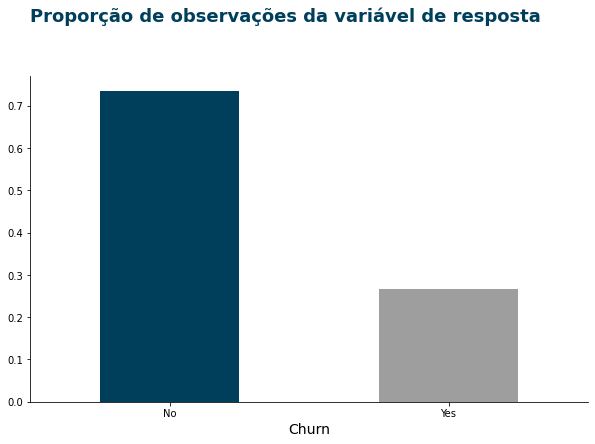

In [12]:
# 1. Criar a figura
fig = plt.figure(figsize=(10, 6)) 
ax = fig.add_subplot(111)

# configurar as cores que usarei no plot
AZUL = "#003F5c" 
CINZA = "#9E9E9E"
CINZA_TEXTO = "#515151"

# Mostrar a proporção de observação de cada classe
prop_response = df['Churn'].value_counts(normalize=True)

# Criar um gráfico de barras, a fim de mostrar a porcentagem de Churn
prop_response.plot(kind='bar', 
                   ax=ax,
                   color=[AZUL, CINZA])

# Título
ax.text(-0.5, 0.9,'Proporção de observações da variável de resposta', fontsize=18, color=AZUL, fontweight='bold')

ax.set_xlabel('Churn',
              fontsize=14)

ax.tick_params(rotation='auto')

#Eliminar as linhas do plot
ax.spines['top'].set_visible(False)
# ax.spines['bottom'].set_visible(False)
#ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

Acima, o gráfico de barras mostra a porcentagem de observações que correspondem a cada classe da variável de resposta: Yes (sim) e No (Não). Trata-se de um conjunto de dados desbalanceado, pois ambas as classes não estão distribuídas igualmente entre todas as observações, nesse caso `no` é a classe majoritária (**73,42%**). Na modelagem, esse desequilíbrio levará a um grande número de falsos negativos.

# **Informação demográfica**

O código abaixo cria um *stacked bar* com porcentagem empilhada para cada atributo demográfico (`gender`, `SeniorCitizen`, `Partner`, `Dependents`), a fim de motrar a porcentagem de `Churn` para cada categoria do atributo.

In [13]:
import math
def percentage_stacked_plot(columns_to_plot, super_title):
    
    '''
            Imprime um gráfico stacked bar da variável de resposta para a variável 
            independente da lista columns_to_plot.

             Parâmetros:
                     columns_to_plot (lista de strings): nomes das colunas a serem plotadas.
                     super_title (string): Título da visualização.

             Returns:
                    None
    '''
    
    number_of_columns = 2
    number_of_rows = math.ceil(len(columns_to_plot)/2)

    # Criar a figura
    fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
    fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # Loop para cada nome de coluna para criar um subplot.
    for index, column in enumerate(columns_to_plot, 1):

        # Criar o subplot
        ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # Calcular a porcentagem de observações da variável resposta para cada grupo da variável independente.
        prop_by_independent = pd.crosstab(df[column], df['Churn']).apply(lambda x: x/x.sum()*100, axis=1)

        prop_by_independent.plot(kind='bar', ax=ax, stacked=True,
                                 rot=0, color=[AZUL, CINZA])

        # Definir a legenda no canto superior direito
        ax.legend(loc="upper right", bbox_to_anchor=(0.62, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # Título de cada gráfico
        names_port = ['Gênero', 'Idoso', 'Parceiros', 'Dependentes']
        ax.set_title('Proporção de observações por ' + column,
                     fontsize=16, loc='left')

        ax.tick_params(rotation='auto')

        #Eliminar as linhas do plot
        ax.spines['top'].set_visible(False)
        #ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)
        ax.spines['right'].set_visible(False)

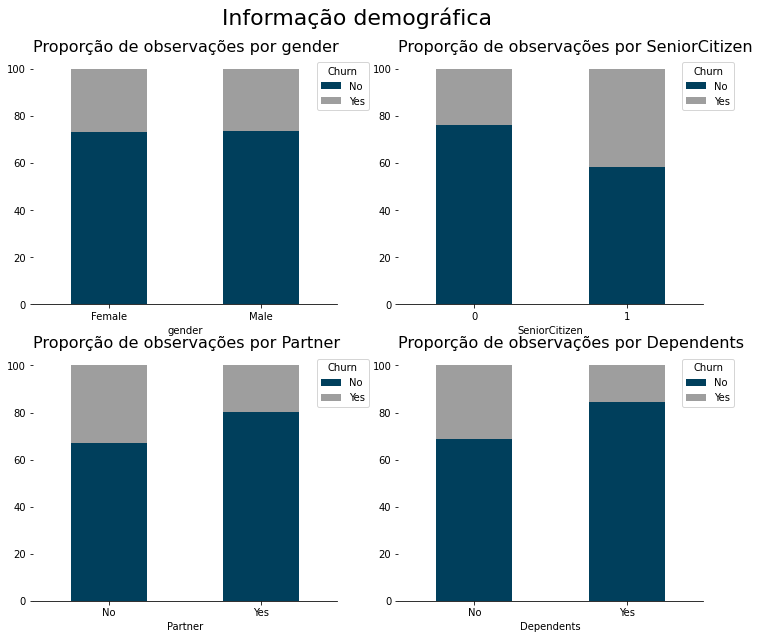

In [14]:
# demographic column names
demographic_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']


# stacked plot of demographic columns
percentage_stacked_plot(demographic_columns, 'Informação demográfica')

Os gráficos gerados acima facilitam a visualização, pois comparam as variáveis de resposta em todos os grupos de uma variável independente. Por exemplo, no primeiro gráfico ele nos mostra a porcentagem de mulheres e homens que saíram ou não, em apenas uma única barra.

Podemos extrair as seguintes conclusões analisando o gráfico:



* A taxa de rotatividade dos idosos é quase o dobro da dos jovens.

* O gênero não tem poder preditivo significativo, pois a porcentagem de ***churn*** mostrada é semelhante tanto quando um cliente é um homem ou uma mulher.

* Clientes com um parceiro desistem menos do que clientes sem parceiro.

* Clientes com dependentes desistem muito menos do que clientes sem dependentes.



# **Informações da conta do cliente**

Será avaliado o percentual de ***Churn*** para cada categoria dos atributos da conta do cliente (`Contract`, `PaperlessBilling`, `PaymentMethod`).

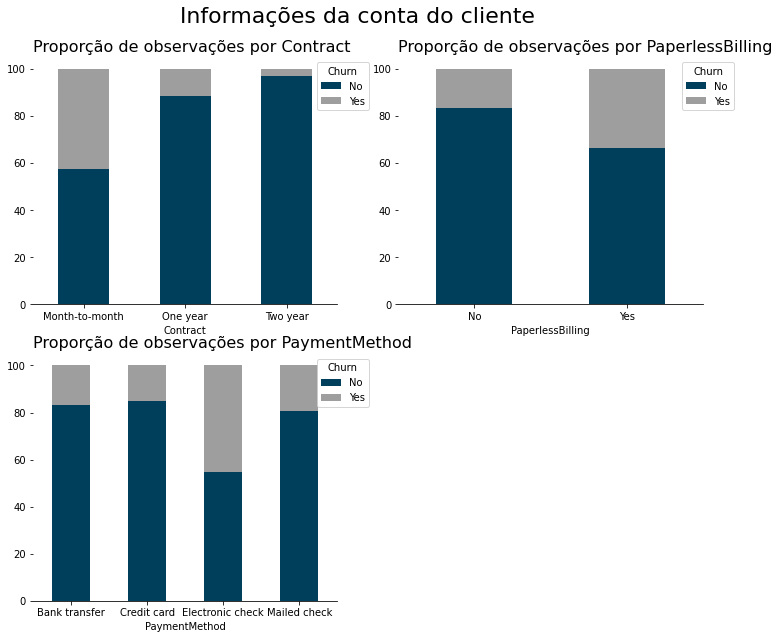

In [15]:
# Nomes das colunas da conta do cliente
account_columns = ['Contract', 'PaperlessBilling', 'PaymentMethod']

# Plotar o gráfico Stacked plot de colunas da conta do cliente
percentage_stacked_plot(account_columns, 'Informações da conta do cliente')

É possível concluir, após a análise dos atributos da conta dos clientes, que:

* Clientes com contratos mensais têm taxas de ***churn*** mais altas em comparação com clientes com contratos anuais.

* Os clientes que optaram pelo cheque eletrônico como forma de pagamento têm maior probabilidade de deixar a empresa.

* Os clientes inscritos com faturamento sem papel, ou seja, faturas por email ou outro meio eletrônico, possuem mais probabilidade  de deixar a empresa.

In [16]:
def histogram_plots(columns_to_plot, super_title):
    
  #Setar o número de linhas e colunas do gráfico
  number_of_columns = 2
  number_of_rows = math.ceil(len(columns_to_plot)/2)

    # Criar a figura
  fig = plt.figure(figsize=(12, 5 * number_of_rows)) 
  fig.suptitle(super_title, fontsize=22,  y=.95)
 

    # Loop para cada nome de coluna demográfica
  for index, column in enumerate(columns_to_plot, 1):

        # Criar o subplot
    ax = fig.add_subplot(number_of_rows, number_of_columns, index)

        # Histograma para cada classe
    df[df['Churn']=='No'][column].plot(kind='hist', ax=ax, density=True, 
                                                       alpha=0.5, color=CINZA, label='No')
    df[df['Churn']=='Yes'][column].plot(kind='hist', ax=ax, density=True,
                                                        alpha=0.5, color=AZUL, label='Yes')
        
        # Colocar a legenda no canto superior direito
    ax.legend(loc="upper right", bbox_to_anchor=(0.5, 0.5, 0.5, 0.5),
                  title='Churn', fancybox=True)

        # Título de cada plot
    ax.set_title('Distribuição de ' + column + ' por churn',
                     fontsize=16, loc='left')

    ax.tick_params(rotation='auto')

    #Eliminar as linhas do plot
    ax.spines['top'].set_visible(False)
    #ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['right'].set_visible(False)
            


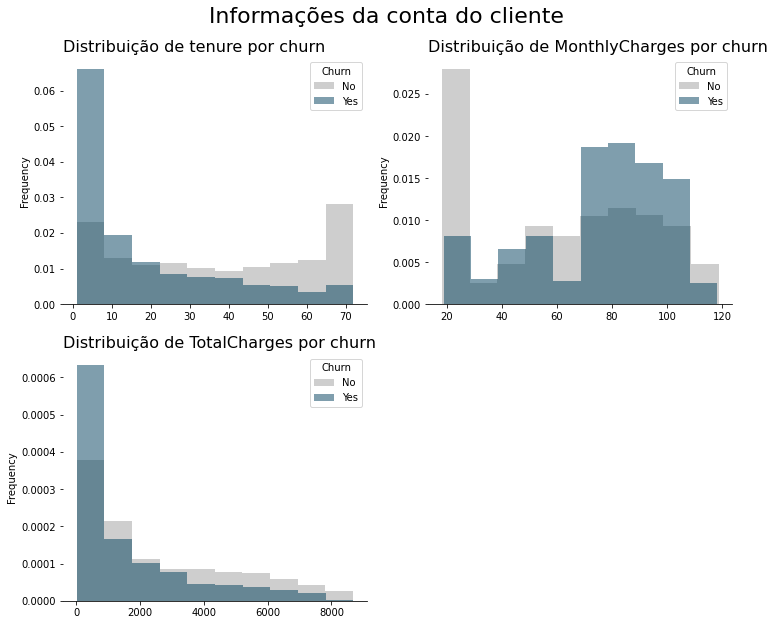

In [17]:
# customer account column names
account_columns_numeric = ['tenure', 'MonthlyCharges', 'TotalCharges']
# histogram of costumer account columns 
histogram_plots(account_columns_numeric, 'Informações da conta do cliente')

Os plots acima nos mostram a distribuição das colunas `tenure`, `MontlyCharges`e `TotalCharges` por **Churn**. Todos os atributos são numéricos e as distribuições de ambas as classes (Não e Sim) são diferentes. Isso que sugere que todos os atributos são úteis para determinar se um cliente se desliga ou não.

A partir dos plots acima, podemos concluir que:

* A taxa de **churn** é maior quando as cobranças mensais são altas;
* Os novos cliente (baixo tempo de permanência) são mais propensos a **churn**.
* Clientes com altas taxas totais são menos propensos a deixar a empresa.

# **Informações de Serviços**

A última análise será feita pela porcentagem da meta para cada categoria das colunas de serviços com stacked bar plots.

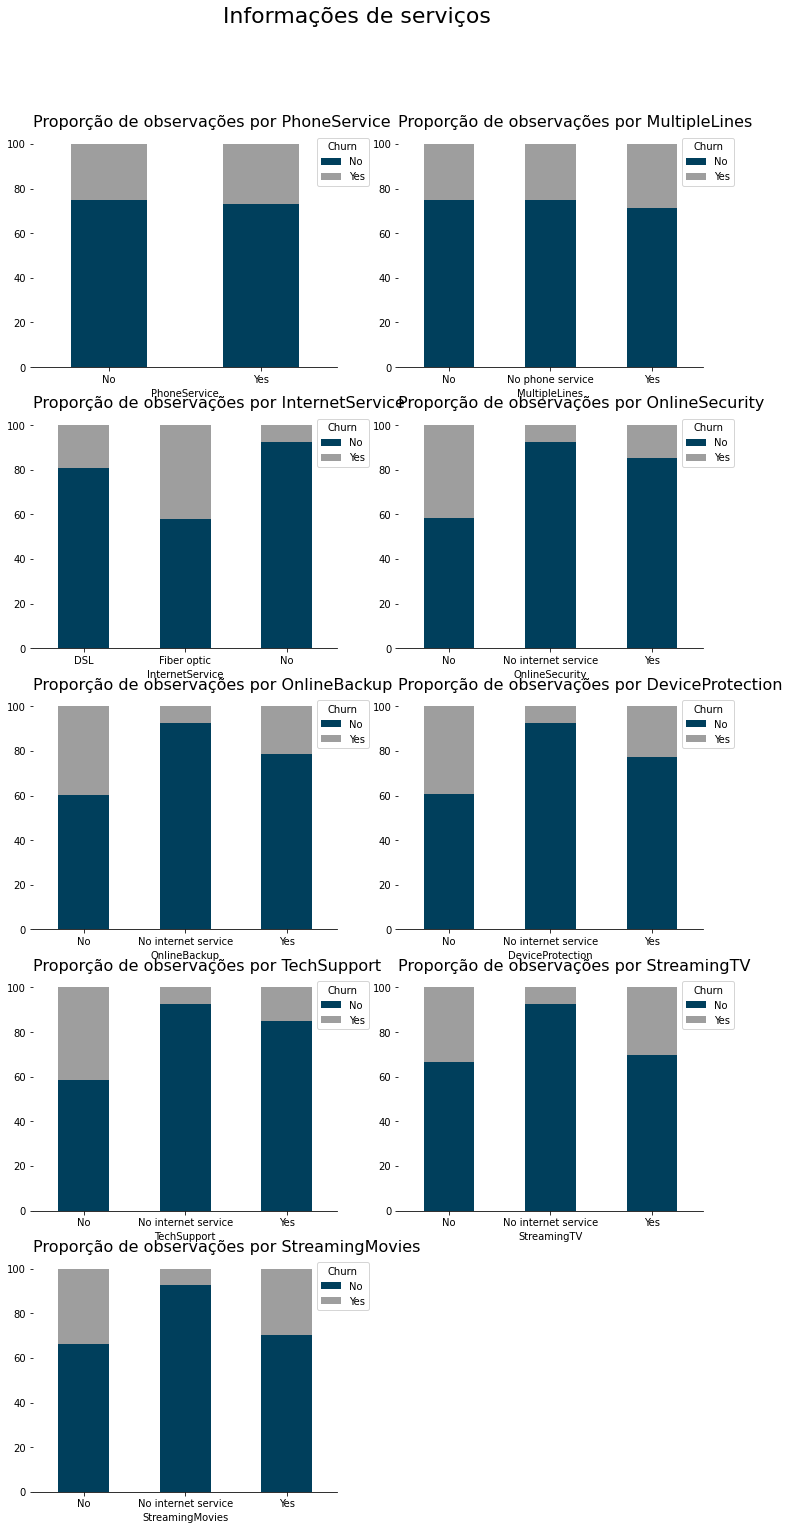

In [18]:
#Nomes das colunas de serviço
services_columns = [ 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Plotar com stacked plot as colunas de serviço
percentage_stacked_plot(services_columns, 'Informações de serviços')

A partir dos plots acima, podemos concluir que:

* Clientes que não possuem o serviço de segurança online tem maior taxa de **churn**;
* Clientes sem o suporte técnico tendem a se desligar mais do que aqueles que possuem o suporte;
* As colunas `PhoneService`, `MultipleLines` e `StreamingMovies` não possuem poder preditivo significativo, pois a porcentagem de churn para todas as classes em ambas as variáveis independentes é quase a mesma;

* Clientes que não possuem Backup online tendem a deixar os serviços da empresa;

* Clientes que possuem fibra ótica são os que possuem mair taxa de **churn**.


# **Informações mútuas — Análise de relações lineares e não lineares**

A informação mútua mede a dependência mútua entre duas variáveis com base em estimativas de $entropia^1$. No aprendizado de máquina, estamos interessados em avaliar o grau de dependência entre cada variável independente e a variável de resposta. Valores mais altos de informações mútuas mostram um maior grau de dependência o que indica que a variável independente será útil para prever o alvo.

In [19]:
# Importar bibliotecas
from sklearn.metrics import mutual_info_score

# Função para calcular a pontuação de informação mútua entre uma série categórica e a coluna Churn.
def compute_mutual_information(categorical_serie):
    return mutual_info_score(categorical_serie, df.Churn)

# Seleciona variáveis categoriais e exclui a variável de resposta
categorical_variables = df.select_dtypes(include=object).drop('Churn', axis=1)

# compute the mutual information score between each categorical variable and the target
feature_importance = categorical_variables.apply(compute_mutual_information).sort_values(ascending=False)

# visualize feature importance
print(feature_importance)

Contract            0.098182
OnlineSecurity      0.064528
TechSupport         0.062873
InternetService     0.055394
OnlineBackup        0.046659
PaymentMethod       0.044423
DeviceProtection    0.043784
StreamingMovies     0.031918
StreamingTV         0.031803
PaperlessBilling    0.019119
Dependents          0.014270
Partner             0.011383
MultipleLines       0.000798
PhoneService        0.000069
gender              0.000037
dtype: float64


O código acima calcula a pontuação de informações mútuas entre cada variável categórica do conjunto de dados e a variável **Churn**.


As informações mútuas permite entender melhor os dados, além de identificar as variáveis preditoras que são completamente independentes da variável alvo. Conforme mostrado acima, as variáveis `gender`, `PhoneService` e `MultipleLines` têm uma pontuação de informação mútua muito próxima de 0, sendo assim essas variáveis não têm uma relação forte com o destino. 

Conclui-se que a informação acima está de acordo com as conclusões percebidas anteriormente ao visualizar os dados. Portanto, é necessário considerar a remoção das variáveis em comento, pois elas não fornecem informações relevantes para prever o resultado.

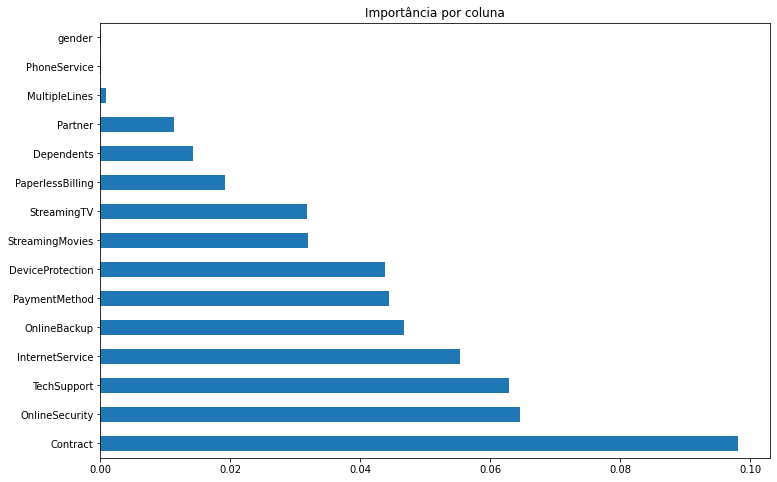

In [20]:
# Mostrar a informação de forma gráfica
feature_importance.plot(kind='barh', figsize=(12,8), title='Importância por coluna' )

# **Preparação dos dados**

**Seleção de atributos**

In [21]:
# Remover as colunas que não contêm informações úteis
labels1 = ['PhoneService', 'MultipleLines'] 
df_clear = df.drop(labels1, axis=1)
df_clear.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer,42.30,1840.75,No
4,Female,0,No,No,2,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Limpeza dos dados**

Consertar ou remover outliers. <br>
Preencher os valores faltantes ou eliminar as linhas/colunas:
* Zero
* Média
* Mediana
* Frequência

In [22]:
print(('Média: ', np.mean(df_clear)))

('Média: ', SeniorCitizen        0.162400
tenure              32.421786
MonthlyCharges      64.798208
TotalCharges      2283.300441
dtype: float64)


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [23]:
print(('Desvio padrão: ', np.std(df_clear)))

('Desvio padrão: ', SeniorCitizen        0.368818
tenure              24.543514
MonthlyCharges      30.083835
TotalCharges      2266.610181
dtype: float64)


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)


Como o coeficiente de variação analisa a dispersão em termos relativos, ele será dado em %. Quanto menor for o valor do coeficiente de variação, mais homogêneos serão os dados, ou seja, menor será a dispersão em torno da média. De uma forma geral, se o CV:

* For menor ou igual a 15% → baixa dispersão: dados homogêneos
* For entre 15 e 30% → média dispersão
* For maior que 30% → alta dispersão: dados heterogêneos

In [24]:
print(('Coeficiente de variação: ', np.std(df_clear)/np.mean(df_clear) * 100))

('Coeficiente de variação: ', SeniorCitizen     227.103902
tenure             75.700686
MonthlyCharges     46.426954
TotalCharges       99.269029
dtype: float64)


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3579: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3438: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f45c40706d0>,
      dtype=object)

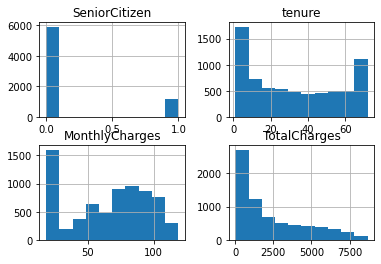

In [25]:
df_clear.hist()

**Feature Engineering**

é o processo de extrair recursos dos dados e transformá-los em um formato adequado ao modelo de aprendizado de máquina. Neste projeto, é necessário transformar variáveis ​​numéricas e categóricas. A maioria dos algoritmos de aprendizado de máquina requer valores numéricos. Sendo assim, todos os atributos categóricos disponíveis no conjunto de dados devem ser codificados em rótulos numéricos antes de treinar o modelo. Além disso, é necessário transformar colunas numéricas em uma escala comum, pois evitará que as colunas com maior valor dominem o processo de aprendizado. 

A coluna `SeniorCitizen` não será modificada, pois já é uma coluna binária.

**Transformação dos dados**

Apenas coluna `SeniorCitizen` não será modificada, pois já é uma coluna binária.

Para transformar os outros dados, será utulizada técnicas diferentes para cada conjunto de colunas. Sendo assim, as técnicas utilizadas no projeto em comento, serão:

*   **Label Encoding**
*   **One-Hot Encoding**
<br>
<br>

**Label Encoding** <br>
É utilizada para substituir valores categóricos por valores numéricos. Essa codificação substitui cada categoria por um rótulo numérico. No projeto em comento, será utilizada a codificação de rótulo com as seguintes variáveis ​​binárias: 

1. `gender`;
2. `Partner`;
3. `Dependents`;
4. `PaperlessBilling`; 
5. `PhoneService`;
6. `Churn`.

In [26]:
df_transformed = df.copy()

# label encoding (binary variables)
label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']

# encode categorical binary features using label encoding
for column in label_encoding_columns:
    if column == 'gender':
        df_transformed[column] = df_transformed[column].map({'Female': 1, 'Male': 0})
    else: 
        df_transformed[column] = df_transformed[column].map({'Yes': 1, 'No': 0}) 

In [27]:
df_transformed.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1,0,1,0,1,0,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,1,Electronic check,29.85,29.85,0
1,0,0,0,0,34,1,No,DSL,Yes,No,Yes,No,No,No,One year,0,Mailed check,56.95,1889.50,0
2,0,0,0,0,2,1,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,1,Mailed check,53.85,108.15,1
3,0,0,0,0,45,0,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,0,Bank transfer,42.30,1840.75,0
4,1,0,0,0,2,1,No,Fiber optic,No,No,No,No,No,No,Month-to-month,1,Electronic check,70.70,151.65,1


**One-Hot Encoding**<br>

Cria uma nova coluna binária para cada nível da variável categórica. A nova coluna contém zeros e uns indicando a ausência ou presença da categoria nos dados. Neste projeto, será aplicada a *One-Hot Encoding* às seguintes variáveis categóricas: 

1. `Contract`;
2. `PaymentMethod`;
3. `MultipleLines`;
4. `InternetServices`;
5. `OnlineSecurity`;
6. `OnlineBackup`; 
7. `DeviceProtection`; 
8. `TechSupport`; 
9. `StreamingTV`;
10. `StreamingMovies`.



In [28]:
# One-hot encoding (Variáveis categóricas com mais de dois níveis)
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

# Aplicar a técnica
df_transformed = pd.get_dummies(df_transformed, columns = one_hot_encoding_columns)

In [29]:
df_transformed.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,1,0,0,1,0,0,0,0,1,0


**Obs:** É possível perceber o aumento significativo do conjunto de dados. A principal desvantagem desse método é a ampliação na dimensionalidade do conjunto de dados. Sendo assim, o método deve ser evitado quando a coluna categórica possuir um grande número de valores exclusivos.

Muitos algoritmos de aprendizado de máquina funcionam melhor quando os recursos estão em uma escala relativamente semelhante e próximos da distribuição normal. *MinMaxScaler*, *RobustScaler*, *StandardScaler* e *Normalizer* são métodos da biblioteca `scikit-learn` para pré-processar dados para *machine learning*.

<br>

***Normalization***

A normalização de dados é uma prática comum em aprendizado de máquina que consiste em transformar colunas numéricas em uma escala comum. Em *machine learning*, alguns valores de recursos diferem de outros várias vezes. As características com valores mais altos dominarão o processo de aprendizagem, no entanto isso não significa que essas variáveis ​​sejam mais importantes para prever o alvo. 

Ela transforma dados multiescala para mesma escala. Após a normalização, todas as variáveis ​​têm influência semelhante no modelo, ou seja, melhora a estabilidade e o desempenho do algoritmo de aprendizado.

Existem várias técnicas de normalização em estatística. No projeto em comento, será utilizado o método **min-max** para redimensionar as colunas numéricas (`tenure`, `MontlyCharges` e `TotalCharges`) para uma escala comum. 

A abordagem **min-max** (também conhecida como normalização) redimensiona o recurso para um intervalo fixo de \[ 0, 1 \], subtraindo o valor mínimo do recurso e, em seguida, dividindo pelo intervalo.

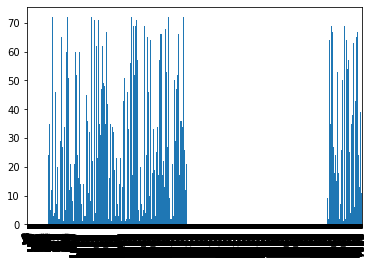

In [30]:
df_transformed['tenure'].plot(kind='bar')

In [31]:
# Min-max normalization (Variáveis numéricas)
min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Dimensionar variáveis numéricas utilizando min-max scaler
for column in min_max_columns:
        # minimum value of the column
        min_column = df_transformed[column].min()
        # maximum value of the column
        max_column = df_transformed[column].max()
        # min max scaler
        df_transformed[column] = (df_transformed[column] - min_column) / (max_column - min_column)   

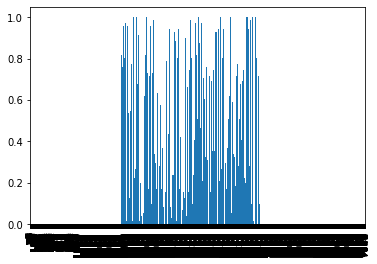

In [32]:
df_transformed['tenure'].plot(kind='bar')

É possível perceber a mudança que houve nos dados antes e depois da aplicação do método de normalização.

In [33]:
df_transformed.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,1,0,1,0,0.000000,0,1,0.115423,0.001275,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,0.385075,0.215867,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,1,0.354229,0.010310,1,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,0.239303,0.210241,0,...,1,0,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,1,0.521891,0.015330,1,...,1,0,0,1,0,0,0,0,1,0


**Definir a baseline**

Em machine learning, geralmente é utilizado um classificador simples chamado **baseline** para avaliar o desempenho de um modelo. No problema de classificação, a taxa de clientes que não se desligaram, pode ser utilizada como **baseline** para avaliar a qualidade dos modelos gerados. 

Esses modelos devem superar os recursos de baseline a serem considerados para previsões futuras.

**Dividir os dados em conjuntos de treino e teste**

Os dados serão divididos da seguinte forma:



*   75% para treino;
*   25% para teste.

A coluna `Churn` será a veriável alvo.



In [34]:
# Definir X (Variáveis independentes)
X = df_transformed.drop(columns='Churn')

#Definir y (Variáveis dependentes)
y = df_transformed['Churn']


In [35]:
# Mostrar se X está correto.
print(X.columns)

# Mostrar se y está correto.
print(y.name)

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer',
       'PaymentMethod_Credit card', 'Paym

Aplicar a função `train_test_split` da biblioteca `sklearn.model_selection` para criar o conjunto de treino e teste.

In [36]:
# 1. Importar a biblioteca
from sklearn.model_selection import train_test_split

# 2. Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=40, shuffle=True)

**Avaliar vários algoritmos**

Selecionar o algoritmo que melhor se encaixa no problema em comento, pois não existe um algoritmo que seja o melhor em todos os projetos. É importante lembra que é necessário avaliar um conjunto de potenciais candidatos e selecionar o que apresenta melhor desempenho.

Neste projeto, serão comparados 6 algoritmos diferentes, todos já implementados no Scikit-Learn:



* Dummy classifier (baseline)
* KNN
* Logistic Regression
* SVM
* Random Forest
* Gradiente Boosting



In [37]:
# 1. Importar as bibliotecas necessárias
from sklearn.dummy import DummyClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

#------
def create_models(seed=2):
    '''
    Criar uma lista de modelos de ML.

            Parameters:
                    seed (integer): random seed of the models

            Returns:
                    models (list): list containing the models
    '''

    models = []
    models.append(('Dummy Classifier', DummyClassifier(random_state=seed, strategy='most_frequent')))
    models.append(('KNN: ', KNeighborsClassifier()))
    models.append(('Logistic Regression', LogisticRegression()))
    models.append(('SVM', SVC(random_state=seed)))
    models.append(('Random Forest', RandomForestClassifier(random_state=seed)))
    models.append(('Gradient Boosting', GradientBoostingClassifier(random_state=seed)))
    models.append(('XGBClassifier', XGBClassifier(random_state=seed)))
    
    return models

# Criar uma lista com todos os algoritmos que serão avaliados
models = create_models()

In [38]:
# 1. Importar biblioteca necessária
from sklearn.metrics import accuracy_score

# Testar a precisão de cada modelo usando hiperparâmetros padrão
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    # Ajustar o modelo com os dados de treinamento
    model.fit(X_train, y_train).predict(X_test)
    # Fazer previsões com os dados de teste
    predictions = model.predict(X_test)
    # Calcular a acurácia
    accuracy = accuracy_score(y_test, predictions)
    # Anexar o nome do modelo e a precisão à lista de modelos
    results.append(accuracy)
    names.append(name)
    # Printar a precisão do classificador
    print('Classifier: {}, Accuracy: {})'.format(name, accuracy))

Classifier: Dummy Classifier, Accuracy: 0.745164960182025)
Classifier: KNN: , Accuracy: 0.7531285551763367)
Classifier: Logistic Regression, Accuracy: 0.7923777019340159)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Classifier: SVM, Accuracy: 0.7878270762229806)
Classifier: Random Forest, Accuracy: 0.7713310580204779)
Classifier: Gradient Boosting, Accuracy: 0.7963594994311718)
Classifier: XGBClassifier, Accuracy: 0.7957906712172924)


Conforme mostrado acima, todos os modelos superam o modelo ***Dummy classifier*** em termos de precisão de previsão. Portanto, podemos afirmar que o aprendizado de máquina é aplicável ao nosso problema porque observamos uma melhora em relação à baseline.

É necessário lembrar que todos os algoritmos foram treinados utilizando os hiperparâmetros padrão. A precisão de muitos algoritmos de aprendizado de máquina é altamente sensível aos hiperparâmetros escolhidos para treinar o modelo. Neste projeto, foi availado apenas o modelo que apresenta maior precisão utilizando os hiperparâmetros padrão. Como mostrado acima, isso corresponde ao modelo ***Gradient Boosting*** que mostra uma precisão de **79.63%**.

Apesar do modelo ***Gradient Boosting*** possuír uma acurácia maior, será utilizado o **XGBoost**, pois se modificarmos os hiperparâmetros, podemos alcançar uma acurácia maior.

Se quiser saber um pouco mais sobre o **[XGBoost](https://www.linkedin.com/pulse/xgboost-o-m%25C3%25A9todo-de-ml-mais-utilizado-kaggle-marcelo-monier-jr-/?trackingId=jWO%2BDO67SSqKZxf6M%2BxYPQ%3D%3D)**, acesse o artigo que explico com mais detalhes sobre esse modelo.



## **Otimização dos Hiperparâmetros**

A seleção de hiperparâmetros consiste em testar o desempenho do modelo em relação a diferentes combinações de hiperparâmetros, selecionar aqueles que apresentam melhor desempenho de acordo com uma métrica escolhida e um método de validação.

Para ajuste de hiperparâmetros, é necessário dividir os dados de treinamento novamente em um conjunto para treinamento e um conjunto para testar os hiperparâmetros, também chamados de validação. É uma prática muito comum utilizar validação cruzada (**k-fold**) para ajuste de hiperparâmetros. O conjunto de treinamento é dividido novamente em **k** amostras de tamanhos iguais, a primeira amostra é utilizada para teste e as k-1 amostras restantes para treinar o modelo, repetindo o processo k vezes. Então, as k métricas de avaliação (neste caso, a precisão) são calculadas para produzir um único avaliador.

É importante ressaltar que o conjunto de validação é utilizado para seleção de hiperparâmetros e não para avaliação do desempenho final do nosso modelo.

Existem várias técnicas para encontrar os melhores hiperparâmetros para um modelo. Os métodos mais populares são (1) ***grid search***, (2) ***random search*** e (3) ***bayesian optimization***. A ***grid search*** testa todas as combinações de hiperparâmetros e seleciona a de melhor desempenho. É um método muito demorado, principalmente quando o número de hiperparâmetros e valores a serem testados é muito alto.

Na ***random search***, é necessário especificar uma grade de hiperparâmetros e combinações aleatórias são selecionadas onde cada combinação de hiperparâmetros tem a mesma chance de ser amostrada. Não analisamos todas as combinações de hiperparâmetros, mas apenas amostras aleatórias dessas combinações. Essa abordagem é muito mais eficiente computacionalmente do que tentar todas as combinações. Entretanto, também tem algumas desvantagens. A principal desvantagem é que nem todas as áreas da grade são cobertas uniformemente, especialmente quando o número de combinações selecionadas da grade é baixo.

Será implementado a ***random search*** no Scikit-learn utilizando a classe `RandomSearchCV` do `pacote sklearn.model_selection`.

Primeiramente, especifica-se a grade de valores de hiperparâmetros utilizando um dicionário (`grid_parameters`) onde as chaves representam os hiperparâmetros e os valores são o conjunto de opções que queremos avaliar. Em seguida, definimos o objeto `RandomizedSearchCV` para tentar diferentes combinações aleatórias dessa grade. O número de combinações de hiperparâmetros amostradas é definido no parâmetro `n_iter`. Naturalmente, aumentar `n_iter` levará, na maioria dos casos, a resultados mais precisos, pois mais combinações são amostradas. Entretanto, em muitas ocasiões, a melhoria no desempenho não será significativa.

In [43]:
# 1.Importar a biblioteca necessária
from sklearn.model_selection import RandomizedSearchCV


# 2. Definir os parâmetros da grade
grid_parameters = {'n_estimators': range(0,1000,50)}


# 3. Implementar a classe RandomizedSearchCV para tentar diferentes combinações de parâmetros
random_search = RandomizedSearchCV(estimator=XGBClassifier(learning_rate=0.1),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# 4. Ajustar o modelo para busca aleatória
random_search.fit(X_train, y_train)

# Mostrar o melhor parâmetro após o ajuste
print("Melhor: {} para {}".format(random_search.best_score_, random_search.best_params_))


# 'min_child_weight':range(1,5,1),
#                    'gamma':[i/10.0 for i in range(0,5)],
#                    'learning_rate':[0.001, 0.01, 0.1, 1],
#                    'max_depth': [3, 4, 5, 6],
#                    'max_features': [None, 'auto', 'sqrt', 'log2'], 
#                    'min_samples_split': [2, 3, 4, 5]

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 20 is smaller than n_iter=150. Running 20 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Melhor: 0.8079230554781154 para {'n_estimators': 50}


In [44]:
# 1. Definir os parâmetros da grade
grid_parameters = {'max_depth':range(1,8,1), 'min_child_weight':range(1,5,1)}


# 2. Implementar a classe RandomizedSearchCV para tentar diferentes combinações de parâmetros
random_search = RandomizedSearchCV(estimator=XGBClassifier(learning_rate=0.1, n_estimators=50),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# 3. Ajustar o modelo para busca aleatória
random_search.fit(X_train, y_train)

# Mostrar o melhor parâmetro após o ajuste
print("Melhor: {} para {}".format(random_search.best_score_, random_search.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 28 is smaller than n_iter=150. Running 28 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Melhor: 0.808681349316978 para {'min_child_weight': 3, 'max_depth': 3}


In [45]:
# 1. Definir os parâmetros da grade
grid_parameters = {'gamma':[i/10.0 for i in range(0,5)]}


# 2. Implementar a classe RandomizedSearchCV para tentar diferentes combinações de parâmetros
random_search = RandomizedSearchCV(estimator=XGBClassifier(learning_rate=0.1, n_estimators=50, min_child_weight=3, max_depth=3),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# 3. Ajustar o modelo para busca aleatória
random_search.fit(X_train, y_train)

# Mostrar o melhor parâmetro após o ajuste
print("Melhor: {} para {}".format(random_search.best_score_, random_search.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 5 is smaller than n_iter=150. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Melhor: 0.8088707429157262 para {'gamma': 0.2}


In [46]:
# 1. Definir os parâmetros da grade
grid_parameters = {'learning_rate':[0.001, 0.01, 0.1, 1]}


# 2. Implementar a classe RandomizedSearchCV para tentar diferentes combinações de parâmetros
random_search = RandomizedSearchCV(estimator=XGBClassifier(n_estimators=50, min_child_weight=3, max_depth=3, gamma=0.2),
                                   param_distributions=grid_parameters,
                                   cv=5,
                                   n_iter=150,
                                   n_jobs=-1)

# 3. Ajustar o modelo para busca aleatória
random_search.fit(X_train, y_train)

# Mostrar o melhor parâmetro após o ajuste
print("Melhor: {} para {}".format(random_search.best_score_, random_search.best_params_))

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 4 is smaller than n_iter=150. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Melhor: 0.8088707429157262 para {'learning_rate': 0.1}


Após ajustar o grid, podemos obter os melhores hiperparâmetros utilizando `best_params_attribute`. Acima, os melhores hiperparâmetros são: 

* `n_estimators`: 50
* `min_child_weight`: 3
* `max_depth`: 3
* `learning_rate`: 0.1
* `gamma`: 0.2

Apesar do notebook do colab insistir para utilizar o `GridSearchCV`, utilizamos essa abordagem, pois é muito mais eficiente computacionalmente do que tentar todas as combinações.

**Desempenho do modelo**

A última etapa do processo de aprendizado de máquina é verificar o desempenho do modelo (melhores hiperparâmetros) utilizando a matriz de confusão e algumas métricas de avaliação.

In [52]:
!pip install scikit-plot -q

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1310
           1       0.61      0.55      0.58       448

    accuracy                           0.80      1758
   macro avg       0.73      0.72      0.72      1758
weighted avg       0.79      0.80      0.79      1758

AUC: 0.7165



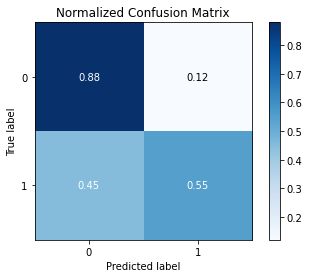

In [53]:
# 1. Importar a biblioteca
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, confusion_matrix, classification_report
from scikitplot.metrics import plot_confusion_matrix, plot_roc

# modelo final
xgb = XGBClassifier(learning_rate=0.1, n_estimators=50, min_child_weight=3, max_depth=3, gamma=0.2)
xgb.fit(X_train, y_train)

# make the predictions
random_search_predictions = xgb.predict(X_test)

# construct the confusion matrix
confusion_matrix = confusion_matrix(y_test, random_search_predictions)

# print classification report 
print(classification_report(y_test, random_search_predictions))

# imprimir a área sob a curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, random_search_predictions)))

# visualize the confusion matrix
plot_confusion_matrix(y_test, random_search_predictions, normalize=True)
plt.show()

# **Conclusão**

O setor de telecomunicações passou por grandes mudanças nos últimos anos. Como resultado de ser uma indústria em crescimento, tornou-se agora um mercado competitivo. Devido ao aumento das opções de serviços neste setor, os clientes tendem a alternar entre esses serviços. Assim, para reter seus clientes, a indústria exige uma maneira de entender e prever o padrão de churn do cliente, o que pode ser feito usando modelagem de churn. A pesquisa em comento foi focada na implementação de algumas dessas técnicas: **Dummy Classifier, Logistic Regression, Random Forest, SVM, Extreme Gradient Boosting (XGBoost), Gradient Boosting e K-nearest neighbors (KNN)**.

O conjunto de dados utilizado foi focado em um programa de retenção de clientes que incluiu vários campos de atributos de clientes e também uma coluna de rotatividade de clientes. Realizamos etapas de pré-processamento neste conjunto de dados e o mesmo foi utilizado como dado de entrada para implementação de todas as técnicas. Foi feita uma comparação entre todas as técnicas mencionadas para classificar se um cliente irá churn ou não. A eficiência desses modelos foi explorada ainda mais passando-os por uma busca em grade. Portanto, concluiu-se que o modelo **XGBoost** funciona melhor para este caso de uso específico. Também foi utilizado a técnica ***random search*** para otimizar os hiperparâmetros. Por meio desta pesquisa, pode-se fazer uma inferência relevante sobre a eficácia de modelos mais antigos, porém mais leves, na previsão do churn de clientes.

$Entropia^1$- A entropia é uma grandeza termodinâmica associada à irreversibilidade dos estados de um sistema físico. É comumente associada ao grau de “desordem” ou “aleatoriedade” de um sistema.

# **Referências**

[1] Michael C. Mozer, Richard Wolniewicz, David B. Grimes,“Predicting Subscriber Dissatisfaction and Improving Retention in the Wireless Telecommunications Industry,” IEEE Transactions On Neural Networks, Vol. 11, pp. 690-696, September 2000. 

<br>

[2] Wai-Ho Au , K. C.C. Chan , Xin Yao, “A novel evolutionary data
mining algorithm with applications to churn prediction,” IEEE
Transactions on Evolutionary Computation, Vol. 7 (6) pp. 532-545,
December 2003.

</br>

[3] N. Kamalraj, A.Malathi,“Applying Data Mining Techniques in Telecom
Churn Prediction, ” in proc. International Journal of Advanced Research
in Computer Science and Software Engineering, 10, October 2013.

</br>

[4] Chuanqi Wang, Ruiqi Li, Peng Wang, Zonghai Chen,“Partition costsensitive CART based on customer value for Telecom customer Churn Prediction, Control Conference (CCC), September 2017.

</br>


[5] Adnan Idris, Asifullah Khan,“Ensemble based Efficient Churn Prediction Model for Telecom”, Frontiers of Information Technology (FIT), International Conference, pp.5680-5684,June 2015.